# Frozen Lake v0

## Abstract


The Frozen lake is a single player game in which the player has to navigate a 4 × 4 grid that consists of a starting point with the goal of arriving at the finish point on the grid from the starting position without falling in any of the death zones (also known as holes).Here, S is the starting point, G is the goal, F is the solid ice where the agent can stand and H is the hole where if the agent goes, it falls down. At each point on the grid, the player has the option to move around to any of the neighboring points.For every state F(ice), the agent gets 0 reward, for state H(hole) it gets -1 reward as in state H the agent will die and upon reaching the goal, the agent gets +1 reward. If the player moves to a hole, the player is killed and re-spawned at the starting point. The objective is to have an agent learn to navigate from the start to the goal without moving onto a hole and to maximize the score over time. At any given time the agent can choose to move either up, down, left, or right.The episode ends when the player either reaches the goal or falls in a hole. You receive a reward of 1 if you reach the goal, and zero otherwise.

### Importing required Libraries

In [554]:
import gym
import numpy as np
import random

### Setting up openAI gym environment

In [555]:
env = gym.make('FrozenLake-v0')
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


In [556]:
#total number of actions
action_size = env.action_space.n
print("Action size", action_size)

Action size 4


In [557]:
#total number of states in the game 
action_shape = env.observation_space.n
print("Action space", action_shape)

Action space 16


In [558]:
#initializing Q table with zeros
qtable = np.zeros((action_shape,action_size))

In [562]:
print(qtable)
print(qtable.size)
print(qtable.shape)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
64
(16, 4)


# Baseline model

#### Hyperparameters - epsilon for the epsilon-greedy approach, gamma is the discounting factor, max_episodes is the maximum amount of times we’ll run the game, max_steps is the maximum steps we’ll run for every episode and alpha is the learning rate.
Learning Hyperparameters

Learning Rate (α): how quickly a network abandons the former value for the new. If the learning rate is 1, the new estimate will be the new Q-value.                                            

Discount Rate (γ): how much to discount the future reward. The idea is that the later a reward comes, the less valuable it becomes. Think inflation of money in the real world.

In [705]:
#setting the total number of episodes for training the data 
total_episodes = 5000

#setting the total number of epsiodes for testing the data 
total_test_episodes = 100

#Maximum steps taken in each episode
max_steps = 99


alpha= 0.7# Learning rate -Factor to balance the ratio of action taken based on past experience to current situtation
gamma = 0.8 # Discounting rate - discount on reward

#exploration parameters
epsilon = 1.0 # Exploration rate
decay_rate = 0.01 # Exponential decay rate

max_epsilon = 1.0
min_epsilon = 0.1

In [706]:
for episode in range(total_episodes):
    
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    
    for step in range(max_steps):
        
        exp_exp_tradeoff = random.uniform(0,1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])
        
        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()
            
        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)
        
        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        qtable[state, action] = qtable[state, action] + alpha * (reward + gamma *np.max(qtable[new_state, :]) - qtable[state, action])
        
        # Our new state is state
        state = new_state
        
        # If done : finish episode
        if done == True:
            break
        
    # Reduce epsilon (because we need less and less exploration and more and more exploitation)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)


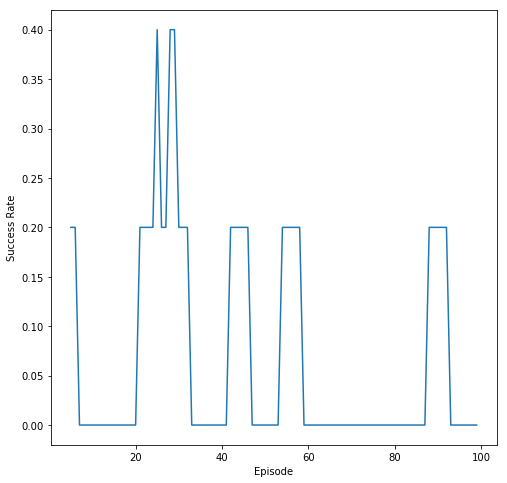

In [707]:
avg_reward = []
window = 5
for i in range(window, total_test_episodes):
    avg_reward.append(sum(rewards[i-window:i])/window)

fig, axes = plt.subplots(figsize=(8, 8))
plt.plot(range(window, total_test_episodes), avg_reward)
axes.set(xlabel='Episode', ylabel='Success Rate')
plt.show()

In [715]:
"""Evaluate agent's performance after Q-learning"""
env.reset()

rewards = []


for episode in range(total_test_episodes):
    
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0 
    total_step = 0
    #print("EPISODE", episode)
    
    for step in range(max_steps):
        #env.render()
        
        #take the action (index) that has the maximum expected future reward given  that state
        action = np.argmax(qtable[state,:])
        
        new_state, reward, done, info= env.step(action)
        
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            print("Episode: {}  Total Reward: {}".format(episode,total_rewards))
            break
        state = new_state
        total_step = total_step + step
        env.render()
print(total_step)
print(max_steps)
print(total_test_episodes)
env.close()
print("total wins in "+str(total_test_episodes)+ " is " +str(sum(rewards)))
print("Average number of steps "+ str(total_step/total_test_episodes))
print("score over time "+ str(sum(rewards)/total_test_episodes))

  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Episode: 0  Total Reward: 0.0
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Episode: 1  Total Reward: 0.0
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
F

SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Episode: 59  Total Reward: 0.0
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
Episode: 60  Total Reward: 0.0
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Episode: 61  Total Reward: 0.0
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Episode: 62  Total Reward: 0.0
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF

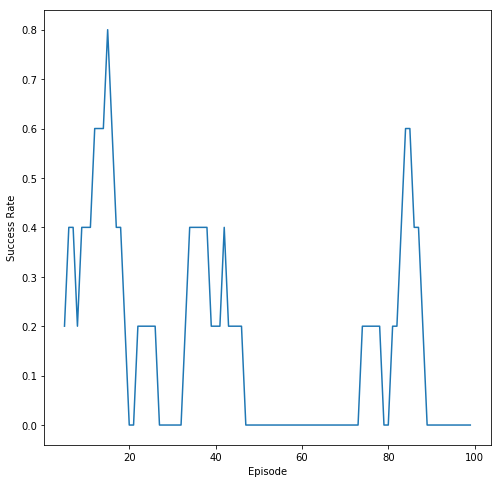

In [716]:
avg_reward = []
window = 5
for i in range(window, total_test_episodes):
    avg_reward.append(sum(rewards[i-window:i])/window)

fig, axes = plt.subplots(figsize=(8, 8))
plt.plot(range(window, total_test_episodes), avg_reward)
axes.set(xlabel='Episode', ylabel='Success Rate')
plt.show()

The baseline model has a score of 0.17 with average number of steps = 2.1

### Improving the baseline model :
### Model1

Decreasing the alpha value (the learning rate) should decrease as you continue to gain a larger and larger knowledge base and also decreasing the gamma value as and when we get closer to the deadline, your preference for near-term reward should increase, as you won't be around long enough to get the long-term reward. The epsilon value should decrease as the trials increases which in turn results in less need of exploration and more of exploitation of Q table values.Basically all three - alpha, gamma and epsilon - should decrease over time because as the agent continues to learn, it actually builds up more resilient priors.

In [693]:
#setting the total number of episodes for training the data 
total_episodes = 5000

#setting the total number of epsiodes for testing the data 
total_test_episodes = 100

#Maximum steps taken in each episode
max_steps = 99


alpha= 0.699# Learning rate
gamma = 0.89# Discounting rate

#exploration parameters
epsilon = 1.0# Exploration rate
decay_rate = 0.01# Exponential decay rate

max_epsilon = 1.0
min_epsilon = 0.1

In [694]:
for episode in range(total_episodes):
    
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    
    for step in range(max_steps):
        
        exp_exp_tradeoff = random.uniform(0,1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])
        
        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()
            
        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)
        
        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        qtable[state, action] = qtable[state, action] + alpha * (reward + gamma *np.max(qtable[new_state, :]) - qtable[state, action])
        
        # Our new state is state
        state = new_state
        
        # If done : finish episode
        if done == True:
            break
        
    # Reduce epsilon (because we need less and less exploration and more and more exploitation)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)


In [697]:
"""Evaluate agent's performance after Q-learning"""
env.reset()

rewards = []


for episode in range(total_test_episodes):
    
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    total_step = 0
   
    #print("EPISODE", episode)
    
    for step in range(max_steps):
        #env.render()
        #take the action (index) that has the maximum expected future reward given  that state
        action = np.argmax(qtable[state,:])
        new_state, reward, done, info= env.step(action)
        total_rewards += reward
        if done:    
            rewards.append(total_rewards)
            print("Episode: {}  Total Reward: {}".format(episode,total_rewards))
            #print("score",total_rewards)
            break
        state = new_state
        total_step = total_step+step
#print(reward)
print(total_step)
print(total_test_episodes)
env.close()
print("total wins in "+str(total_test_episodes)+ " is " +str(sum(rewards)))
print("Average steps per episode "+str(total_step/total_test_episodes))
print("score over time "+ str(sum(rewards)/total_test_episodes))

Episode: 1  Total Reward: 1.0
Episode: 2  Total Reward: 1.0
Episode: 3  Total Reward: 0.0
Episode: 4  Total Reward: 0.0
Episode: 5  Total Reward: 0.0
Episode: 6  Total Reward: 1.0
Episode: 7  Total Reward: 1.0
Episode: 8  Total Reward: 0.0
Episode: 9  Total Reward: 1.0
Episode: 10  Total Reward: 1.0
Episode: 11  Total Reward: 0.0
Episode: 12  Total Reward: 1.0
Episode: 13  Total Reward: 0.0
Episode: 14  Total Reward: 0.0
Episode: 15  Total Reward: 1.0
Episode: 16  Total Reward: 1.0
Episode: 17  Total Reward: 0.0
Episode: 18  Total Reward: 1.0
Episode: 19  Total Reward: 0.0
Episode: 20  Total Reward: 0.0
Episode: 21  Total Reward: 0.0
Episode: 22  Total Reward: 0.0
Episode: 23  Total Reward: 1.0
Episode: 24  Total Reward: 1.0
Episode: 25  Total Reward: 0.0
Episode: 26  Total Reward: 1.0
Episode: 27  Total Reward: 1.0
Episode: 28  Total Reward: 0.0
Episode: 30  Total Reward: 0.0
Episode: 31  Total Reward: 1.0
Episode: 32  Total Reward: 1.0
Episode: 33  Total Reward: 1.0
Episode: 34  Tota

Model 1 score - 0.48 is much higher than that of baseline model score = 0.17 on tweaking the parameters of alpha and gamma   (lowering alpha slightly increasing gamma). The average number of steps in this case = 1.71

## Model 2 -

On further tweaking the parameters - lowering the value of epsilon to 0.8, slightly differing alpha value = 0.6899 and gamma = 0.899...

In [655]:
#setting the total number of episodes for training the data 
total_episodes = 5000

#setting the total number of epsiodes for testing the data 
total_test_episodes = 100

#Maximum steps taken in each episode
max_steps = 99


alpha= 0.6899# Learning rate
gamma = 0.899# Discounting rate

#exploration parameters
epsilon = 0.8# Exploration rate
decay_rate = 0.01# Exponential decay rate

max_epsilon = 1.0
min_epsilon = 0.1

In [656]:
for episode in range(total_episodes):
    
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    
    for step in range(max_steps):
        
        exp_exp_tradeoff = random.uniform(0,1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])
        
        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()
            
        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)
        
        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        qtable[state, action] = qtable[state, action] + alpha * (reward + gamma *np.max(qtable[new_state, :]) - qtable[state, action])
        
        # Our new state is state
        state = new_state
        
        # If done : finish episode
        if done == True:
            break
        
    # Reduce epsilon (because we need less and less exploration and more and more exploitation)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)


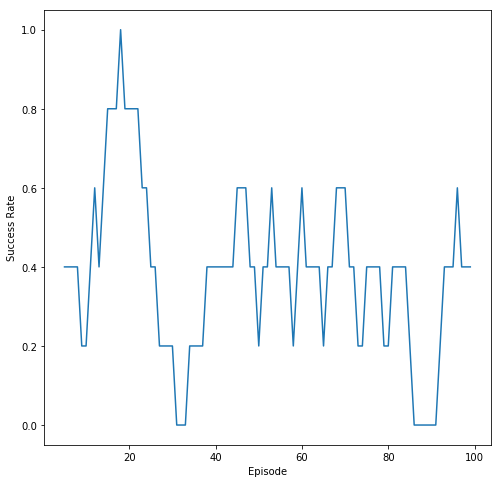

In [657]:
avg_reward = []
window = 5
for i in range(window, total_test_episodes):
    avg_reward.append(sum(rewards[i-window:i])/window)

fig, axes = plt.subplots(figsize=(8, 8))
plt.plot(range(window, total_test_episodes), avg_reward)
axes.set(xlabel='Episode', ylabel='Success Rate')
plt.show()

In [658]:
"""Evaluate agent's performance after Q-learning"""
env.reset()

rewards = []


for episode in range(total_test_episodes):
    
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0 
    total_step= 0
    #print("EPISODE", episode)
    
    for step in range(max_steps):
        #env.render()
        
        #take the action (index) that has the maximum expected future reward given  that state
        action = np.argmax(qtable[state,:])
        
        new_state, reward, done, info= env.step(action)
        
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            #print("score",total_rewards)
            break
        state = new_state
        total_step += step
print(total_test_episodes)
print(total_step)
env.close()
print("total wins in "+str(total_test_episodes)+ " is " +str(sum(rewards)))
print("average steps per episode"+str(total_step/total_test_episodes))
print("score over time "+ str(sum(rewards)/total_test_episodes))

100
2485
total wins in 100 is 44.0
average steps per episode24.85
score over time 0.44


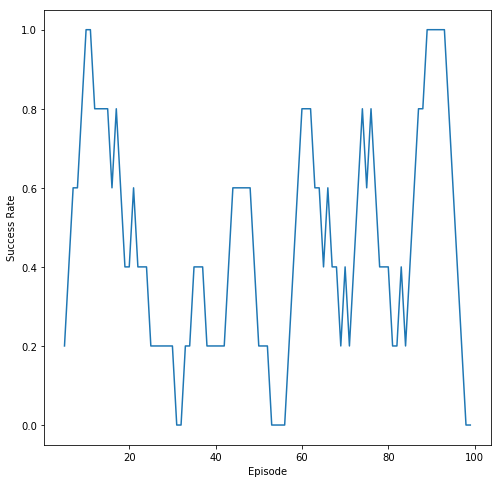

In [659]:
avg_reward = []
window = 5
for i in range(window, total_test_episodes):
    avg_reward.append(sum(rewards[i-window:i])/window)

fig, axes = plt.subplots(figsize=(8, 8))
plt.plot(range(window, total_test_episodes), avg_reward)
axes.set(xlabel='Episode', ylabel='Success Rate')
plt.show()

Model 2 does much better than the baseline model with a score of 0.44 but lesser than Model 1 - 0.48 with average number of steps = 24.85 on changing the value of epsilon (decreasing the value of epsilon)

## Model 3 -

Changing the values of decay rate to 0.00078 and epsilon to 0.890, along with alpha and gamma values being - 0.69 and 0.899 respectively...

In [620]:
#setting the total number of episodes for training the data 
total_episodes = 5000

#setting the total number of epsiodes for testing the data 
total_test_episodes = 100

#Maximum steps taken in each episode
max_steps = 99


alpha= 0.69# Learning rate
gamma = 0.99# Discounting rate

#exploration parameters
epsilon = 0.899# Exploration rate
decay_rate = 0.00078# Exponential decay rate

max_epsilon = 1.0
min_epsilon = 0.1

In [621]:
for episode in range(total_episodes):
    
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    
    for step in range(max_steps):
        
        exp_exp_tradeoff = random.uniform(0,1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon: 0.5>1
            action = np.argmax(qtable[state,:])
        
        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()
            
        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)
        
        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        qtable[state, action] = qtable[state, action] + alpha * (reward + gamma *np.max(qtable[new_state, :]) - qtable[state, action])
        
        # Our new state is state
        state = new_state
        
        # If done : finish episode
        if done == True:
            break
        
    # Reduce epsilon (because we need less and less exploration and more and more exploitation)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    print(epsilon)

1.0
0.9992982737088311
0.9985970945507596
0.9978964620991883
0.997196375927852
0.9964968356108187
0.9957978407224877
0.9950993908375907
0.9944014855311907
0.9937041243786819
0.9930073069557902
0.9923110328385716
0.9916153016034127
0.9909201128270309
0.9902254660864732
0.9895313609591165
0.9888377970226674
0.9881447738551613
0.987452291034963
0.986760348140766
0.9860689447515921
0.9853780804467915
0.9846877548060424
0.9839979674093507
0.9833087178370495
0.9826200056697996
0.9819318304885883
0.9812441918747298
0.980557089409865
0.9798705226759604
0.979184491255309
0.9784989947305293
0.9778140326845649
0.9771296047006852
0.976445710362484
0.97576234925388
0.9750795209591163
0.9743972250627602
0.9737154611497028
0.9730342288051588
0.9723535276146666
0.9716733571640875
0.9709937170396059
0.9703146068277285
0.9696360261152849
0.9689579744894262
0.968280451537626
0.9676034568476793
0.9669269900077027
0.9662510506061334
0.9655756382317301
0.9649007524735718
0.9642263929210578
0.963552559163908

0.6729364272341565
0.6724897110628691
0.6720433431943397
0.6715973233569978
0.6711516512794853
0.6707063266906548
0.6702613493195712
0.6698167188955101
0.6693724351479583
0.6689284978066137
0.6684849066013846
0.6680416612623903
0.6675987615199601
0.6671562071046341
0.6667139977471619
0.6662721331785033
0.6658306131298283
0.6653894373325155
0.6649486055181538
0.6645081174185413
0.6640679727656849
0.6636281712918003
0.6631887127293127
0.6627495968108552
0.6623108232692698
0.6618723918376065
0.6614343022491238
0.660996554237288
0.6605591475357729
0.6601220818784607
0.6596853569994402
0.6592489726330083
0.6588129285136686
0.6583772243761318
0.6579418599553154
0.6575068349863439
0.657072149204548
0.6566378023454649
0.6562037941448379
0.6557701243386165
0.6553367926629557
0.6549037988542169
0.6544711426489663
0.6540388237839759
0.6536068419962232
0.6531751970228902
0.652743888601364
0.6523129164692368
0.651882280364305
0.6514519800245695
0.6510220151882357
0.650592385593713
0.650163090979614

0.4952406276406496
0.4949324601520345
0.49462453294034037
0.4943168458182242
0.49400939859848925
0.49370219109408464
0.49339522311810513
0.49308849448379155
0.49278200500453007
0.4924757544938526
0.49216974276543635
0.4918639696331035
0.4915584349108221
0.49125313841270435
0.49094807995300827
0.49064325934613595
0.49033867640663475
0.49003433094919635
0.48973022278865685
0.48942635173999693
0.48912271761834136
0.48881932023895924
0.4885161594172637
0.4882132349688113
0.4879105467093031
0.48760809445458353
0.4873058780206406
0.4870038972236058
0.48670215187975396
0.48640064180550324
0.48609936681741495
0.48579832673219336
0.48549752136668567
0.4851969505378818
0.4848966140629145
0.48459651175905916
0.48429664344373347
0.4839970089344974
0.4836976080490534
0.48339844060524606
0.4830995064210617
0.482800805314629
0.48250233710421786
0.48220410160824057
0.48190609864525047
0.4816083280339426
0.4813107895931532
0.48101348314186
0.4807164084991816
0.48041956548437803
0.48012295391684967
0.47

0.33309235847382956
0.3329106173224833
0.3327290178739638
0.33254756001778596
0.3323662436435507
0.3321850686409453
0.33200403489974284
0.3318231423098025
0.33164239076106894
0.3314617801435731
0.33128131034743136
0.33110098126284604
0.33092079278010483
0.3307407447895811
0.33056083718173357
0.3303810698471066
0.3302014426763295
0.3300219555601173
0.32984260838926993
0.3296634010546726
0.32948433344729555
0.3293054054581941
0.3291266169785083
0.32894796789946346
0.32876945811236924
0.3285910875086204
0.3284128559796964
0.3282347634171609
0.3280568097126625
0.3278789947579342
0.32770131844479333
0.3275237806651416
0.3273463813109651
0.3271691202743339
0.3269919974474026
0.3268150127224095
0.3266381659916771
0.326461457147612
0.32628488608270423
0.32610845268952826
0.32593215686074184
0.32575599848908665
0.32557997746738787
0.3254040936885544
0.32522834704557846
0.32505273743153573
0.32487726473958545
0.32470192886297
0.32452672969501495
0.3243516671291292
0.3241767410588047
0.3240019513

0.25476916724672305
0.2546484943648126
0.25452791557105103
0.25440743079207795
0.25428703995459057
0.2541667429853431
0.2540465398111468
0.25392643035886997
0.2538064145554382
0.2536864923278338
0.25356666360309604
0.25344692830832116
0.25332728637066226
0.25320773771732896
0.2530882822755882
0.25296891997276294
0.25284965073623344
0.2527304744934361
0.25261139117186415
0.2524924006990673
0.2523735030026517
0.2522546980102801
0.25213598564967143
0.2520173658486011
0.2518988385349009
0.2517804036364587
0.2516620610812188
0.2515438107971815
0.25142565271240336
0.25130758675499704
0.25118961285313113
0.2510717309350304
0.2509539409289754
0.25083624276330263
0.25071863636640473
0.2506011216667298
0.25048369859278197
0.250366367073121
0.2502491270363623
0.2501319784111772
0.2500149211262924
0.24989795511049026
0.24978108029260856
0.2496642966015408
0.24954760396623568
0.24943100231569743
0.2493144915789856
0.24919807168521504
0.24908174256355592
0.24896550414323354
0.2488493563535285
0.2487

0.20585547954576794
0.20577294446458844
0.20569047373567156
0.20560806730884224
0.20552572513396428
0.20544344716094076
0.20536123333971373
0.20527908362026437
0.20519699795261265
0.2051149762868178
0.20503301857297773
0.20495112476122943
0.20486929480174862
0.20478752864475006
0.2047058262404871
0.2046241875392521
0.20454261249137598
0.2044611010472286
0.20437965315721823
0.20429826877179214
0.2042169478414359
0.20413569031667406
0.2040544961480693
0.20397336528622328
0.20389229768177586
0.2038112932854056
0.20373035204782936
0.2036494739198025
0.20356865885211878
0.2034879067956103
0.2034072177011475
0.20332659151963917
0.20324602820203225
0.20316552769931212
0.20308508996250219
0.2030047149426642
0.20292440259089792
0.2028441528583414
0.2027639656961706
0.20268384105559978
0.20260377888788092
0.20252377914430436
0.20244384177619817
0.20236396673492854
0.20228415397189936
0.20220440343855267
0.2021247150863681
0.20204508886686343
0.2019655247315939
0.20188602263215283
0.2018065825201

0.17072610658167353
0.1706709617278287
0.17061585987019912
0.17056080097526088
0.17050578500951613
0.17045081193949313
0.1703958817317463
0.1703409943528561
0.17028614976942902
0.1702313479480977
0.1701765888555205
0.17012187245838223
0.1700671987233933
0.17001256761729022
0.16995797910683547
0.16990343315881734
0.1698489297400501
0.16979446881737387
0.1697400503576546
0.16968567432778417
0.1696313406946801
0.1695770494252859
0.1695228004865707
0.16946859384552945
0.16941442946918284
0.1693603073245773
0.1693062273787848
0.16925218959890326
0.16919819395205593
0.169144240405392
0.169090328926086
0.1690364594813383
0.16898263203837466
0.1689288465644465
0.16887510302683068
0.1688214013928297
0.16876774162977143
0.1687141237050093
0.16866054758592214
0.16860701323991426
0.1685535206344153
0.16850006973688048
0.16844666051479018
0.16839329293565025
0.16833996696699183
0.16828668257637147
0.16823343973137084
0.1681802383995971
0.16812707854868245
0.16807396014628453
0.168020883160086
0.167

0.14670516524255892
0.1466687494176877
0.1466323619860851
0.14659600292561292
0.1465596722141504
0.14652336982959385
0.14648709574985697
0.14645084995287055
0.1464146324165827
0.14637844311895862
0.1463422820379808
0.14630614915164877
0.14627004443797934
0.14623396787500634
0.14619791944078087
0.14616189911337094
0.1461259068708619
0.14608994269135603
0.1460540065529727
0.1460180984338484
0.1459822183121366
0.14594636616600778
0.1459105419736496
0.14587474571326658
0.14583897736308027
0.14580323690132918
0.14576752430626888
0.14573183955617172
0.14569618262932718
0.14566055350404156
0.14562495215863813
0.14558937857145696
0.14555383272085515
0.14551831458520653
0.14548282414290195
0.14544736137234895
0.14541192625197202
0.14537651876021243
0.14534113887552827
0.14530578657639437
0.14527046184130243
0.14523516464876085
0.14519989497729488
0.14516465280544638
0.14512943811177406
0.14509425087485325
0.1450590910732761
0.14502395868565132
0.14498885369060444
0.14495377606677745
0.144918725

0.12987179616984856
0.1298485052534743
0.12982523249693156
0.1298019778860612
0.12977874140671514
0.1297555230447562
0.12973232278605845
0.1297091406165068
0.1296859765219972
0.12966283048843663
0.12963970250174306
0.12961659254784538
0.12959350061268354
0.12957042668220836
0.12954737074238173
0.12952433277917633
0.12950131277857593
0.12947831072657512
0.12945532660917947
0.12943236041240544
0.1294094121222804
0.12938648172484257
0.12936356920614117
0.12934067455223616
0.12931779774919847
0.1292949387831098
0.1292720976400628
0.12924927430616093
0.12922646876751842
0.12920368101026042
0.12918091102052287
0.12915815878445247
0.12913542428820676
0.12911270751795412
0.1290900084598736
0.12906732710015514
0.12904466342499937
0.12902201742061775
0.12899938907323238
0.12897677836907626
0.12895418529439295
0.12893160983543692
0.12890905197847316
0.12888651170977755
0.12886398901563653
0.12884148388234734
0.1288189962962178
0.12879652624356652
0.1287740737107227
0.1287516386840262
0.1287292211

0.11943615056701201
0.11942099628050978
0.11940585380974232
0.1193907231454969
0.11937560427856804
0.11936049719975741
0.1193454018998739
0.11933031836973348
0.11931524660015937
0.11930018658198187
0.1192851383060385
0.11927010176317385
0.11925507694423973
0.119240063840095
0.1192250624416057
0.119210072739645
0.11919509472509313
0.1191801283888375
0.11916517372177256
0.11915023071479991
0.11913529935882822
0.11912037964477323
0.11910547156355783
0.1190905751061119
0.11907569026337246
0.11906081702628357
0.11904595538579635
0.11903110533286897
0.11901626685846665
0.11900143995356169
0.11898662460913337
0.11897182081616806
0.11895702856565911
0.11894224784860694
0.11892747865601892
0.11891272097890952
0.11889797480830014
0.11888324013521921
0.11886851695070216
0.11885380524579142
0.11883910501153636
0.11882441623899338
0.1188097389192258
0.11879507304330399
0.11878041860230518
0.11876577558731363
0.11875114398942052
0.118736523799724
0.11872191500932913
0.11870731760934794
0.11869273159

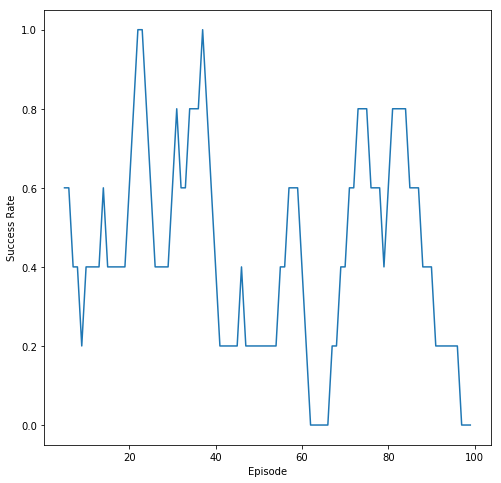

In [622]:
avg_reward = []
window = 5
for i in range(window, total_test_episodes):
    avg_reward.append(sum(rewards[i-window:i])/window)

fig, axes = plt.subplots(figsize=(8, 8))
plt.plot(range(window, total_test_episodes), avg_reward)
axes.set(xlabel='Episode', ylabel='Success Rate')
plt.show()

In [631]:
"""Evaluate agent's performance after Q-learning"""
env.reset()

rewards = []


for episode in range(total_test_episodes):
    
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0 
    total_step = 0
   
    #print("EPISODE", episode)
    
    for step in range(max_steps):
        #env.render()
        
        #take the action (index) that has the maximum expected future reward given  that state
        action = np.argmax(qtable[state,:])
        
        new_state, reward, done, info= env.step(action)
        
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            #print("score",total_rewards)
            break
        state = new_state
        total_step += step
print(total_test_episodes)
print(total_step)
print("Average steps taken per episode:"+str(total_step/total_test_episodes))
env.close()
print("total wins in "+str(total_test_episodes)+ " is " +str(sum(rewards)))
print("score over time "+ str(sum(rewards)/total_test_episodes))

100
253
Average steps taken per episode:2.53
total wins in 100 is 78.0
score over time 0.78


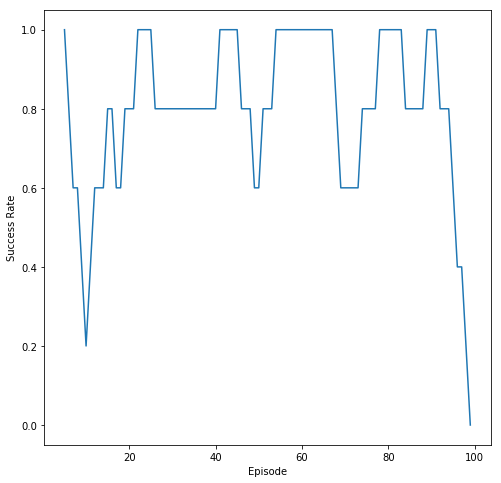

In [632]:
avg_reward = []
window = 5
for i in range(window, total_test_episodes):
    avg_reward.append(sum(rewards[i-window:i])/window)

fig, axes = plt.subplots(figsize=(8, 8))
plt.plot(range(window, total_test_episodes), avg_reward)
axes.set(xlabel='Episode', ylabel='Success Rate')
plt.show()

Model 4 is the best compared to all the other models and also compared to baseline model, score over time = 0.78 and average number of steps = 2.53.

### Trying a policy other than maxQ(s', a')  -

In [730]:
#setting the total number of episodes for training the data 
total_episodes = 5000

#setting the total number of epsiodes for testing the data 
total_test_episodes = 100

#Maximum steps taken in each episode
max_steps = 99


alpha= 0.7# Learning rate -Factor to balance the ratio of action taken based on past experience to current situtation
gamma = 0.8 # Discounting rate - discount on reward

#exploration parameters
epsilon = 1.0 # Exploration rate
decay_rate = 0.01 # Exponential decay rate

max_epsilon = 1.0
min_epsilon = 0.1

In [731]:
for episode in range(total_episodes):
    
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    
    for step in range(max_steps):
        
        exp_exp_tradeoff = random.uniform(0,1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])
        
        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()
            
        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)
        
        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        qtable[state, action] = qtable[state, action] + alpha * (reward + gamma *np.max(qtable[new_state, :]) - qtable[state, action])
        
        # Our new state is state
        state = new_state
        
        # If done : finish episode
        if done == True:
            break
        
    # Reduce epsilon (because we need less and less exploration and more and more exploitation)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    #print(epsilon)

In [732]:
"""Evaluate agent's performance after Q-learning"""
env.reset()

rewards = []


for episode in range(total_test_episodes):
    
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0 
    total_step = 0
   
    #print("EPISODE", episode)
    
    for step in range(max_steps):
        #env.render()
        
        #take the action (index) that has the maximum expected future reward given  that state
        action = np.argmin(qtable[state,:])
        
        new_state, reward, done, info= env.step(action)
        
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            #print("score",total_rewards)
            break
        state = new_state
        total_step += step
    #print(reward)
print(total_test_episodes)
print("Average steps taken per episode:"+str(total_step/total_test_episodes))
env.close()
print("total wins in "+str(total_test_episodes)+ " is " +str(sum(rewards)))
print("score over time "+ str(sum(rewards)/total_test_episodes))

100
Average steps taken per episode:0.0
total wins in 100 is 0.0
score over time 0.0


In [733]:
"""Evaluate agent's performance after Q-learning"""
env.reset()

rewards = []


for episode in range(total_test_episodes):
    
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0 
    total_step = 0
   
    #print("EPISODE", episode)
    
    for step in range(max_steps):
        #env.render()
        
        #take the action (index) that has the maximum expected future reward given  that state
        action = np.all(qtable[state,:])
        
        new_state, reward, done, info= env.step(action)
        
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            #print("score",total_rewards)
            break
        state = new_state
        total_step += step
    #print(reward)
print(total_test_episodes)
print("Average steps taken per episode:"+str(total_step/total_test_episodes))
env.close()
print("total wins in "+str(total_test_episodes)+ " is " +str(sum(rewards)))
print("score over time "+ str(sum(rewards)/total_test_episodes))

100
Average steps taken per episode:0.06
total wins in 100 is 4.0
score over time 0.04


In [734]:
"""Evaluate agent's performance after Q-learning"""
env.reset()

rewards = []


for episode in range(total_test_episodes):
    
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0 
    total_step = 0
   
    #print("EPISODE", episode)
    
    for step in range(max_steps):
        #env.render()
        
        #take the action (index) that has the maximum expected future reward given  that state
        action = np.any(qtable[state,:])
        
        new_state, reward, done, info= env.step(action)
        
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            #print("score",total_rewards)
            break
        state = new_state
        total_step += step
    #print(reward)
print(total_test_episodes)
print("Average steps taken per episode:"+str(total_step/total_test_episodes))
env.close()
print("total wins in "+str(total_test_episodes)+ " is " +str(sum(rewards)))
print("score over time "+ str(sum(rewards)/total_test_episodes))

100
Average steps taken per episode:0.0
total wins in 100 is 5.0
score over time 0.05


Trying different policy other than argmax, argmin - considering the least value for our next state results in a least score of 0.0, any values from Q table also results in a lesser score - 0.05 and all values from Q table also results in a lesser score of 0.04 which is way lesser than any of our models including baseline model.

## Conclusion

Answer the following questions for all of the:                                                             
* Establish a baseline performance. How well did your RL Q-learning do on your problem?                      
 The first model with the following hyperparameters is the baseline model: total_episodes = 5000,total_test_episodes = 100,max_steps = 99,alpha= 0.7,gamma = 0.8,epsilon = 1.0,decay_rate = 0.01,max_epsilon = 1.0,min_epsilon = 0.1 with the score over time = 0.


* What are the states, the actions and the size of the Q-table?                                               
States - State Space:The states here are S=Start,F=Frozen,H=Hole and G=Goal. That is there are 4x4=16 states. A set with a cardinality of 16, i.e., the State Space is the set of all possible situations our cursor/ toy text could inhabit. The state should contain useful information the agent needs to make the right action.  
                                                                                                                   
                                                                                                                   

Actions -  : Up, Down, Left or Right .The action in our case can be to move towards the goal/destination from starting point, frozen surface(safe) and hole(not safe) using the arrow keys up,down, left and right. Hence there are 4 possible actions in this case.                                                                                                     
                                                                                                                                               
    
    
The (state,action) value combinations are stored in a Q-table.
Qtable size - 64
Qtable shape - (16,4).                                               


* What are the rewards? Why did you choose them?
Amount of reward achieved by the previous action. 0 reward point associated with every time step until the player reaches the goal. The reward point is 1 for successfully reaching the goal. A negtive or -1 if the player steps into a hole and dies.  The rewards was already set by the frozen lake v0 environment and have continued to use them in my code as is.
                                                                                                                         

* How did you choose alpha and gamma in the following equation?(Try at least one additional value for alpha and gamma)
By trying out with baseline model's hyperparameters at first and later on changing values by decreasing the learning rate value and decreasing the gamma value from 0.7 and 0.8 to 0.49 and 0.99 respectively, the score over time was able to increase from 0.19 to 0.77 (Model 1 baseline model to model 4)


* How did it change the baseline performance?
The score over time for baseline model was initially 0.19 and by changing the hyperparameter values (by decreasing the gamma value/discounting rate and decreasing the alpha/learning rate values) was able to improve the score to 0.72 over time.
Baseline model --                                                                                       
alpha:0.7 gamma: 0.8  score - 0.17                                                                       
Model 1 --                                                                                                       
alpha:0.699 gamma:0.89 score - 0.48                                                               
Model 2                                                                                                               
alpha:0.6899 gamma:0.899 score - 0.44                                                                                     
Model 3                                                                                                              
alpha:0.69 gamma:0.99 (along with varying epsilon - 0.899 and decay rate - 0.00078) score - 0.78                            
                          

* Try a policy other than maxQ(s', a'). How did it change the baseline performance?
 Trying a ploicy other than maxQ(s',a') by changing the argmax to argmin the score over time is decreasing compared to all the models since it is trying to take the least value from the Q table and perform the next action based on this value.


* How did you choose your decay rate and starting epsilon? Try at least one additional value for epsilon
  and the decay rate. How did it change the baseline performance? What is the value of epsilon when if
  you reach the max steps per episode?
Initially the Decay rate was set to 0.01 and starting epsilon was set to 1.0, later using hit and trial method, manually changing the value of epsilon to 0.8 and decay rate to 0.01, the score increased from 0.17 to 0.44 (along with alpha= 0.6899,gamma = 0.899), and further trying with another value of epsilon to 0.899 and decay rate to 0.00078 (along with alpha= 0.69,gamma = 0.99)  the score increased to 0.78 much higher than the score of the baseline model.The value of epsilon when  you reach the max steps per episode is 0.11823 for Model 4 (closer to min_epsilon).
    
    
    
* What is the average number of steps taken per episode?   
Average steps taken per episode is given by (total_steps of all episodes/total number of episodes) for baseline model is 2.1, Model 1 - 1.71, Model 2 - 24.85 and Model 3 - 2.53.
                                                                       
                                                                                                         
                                                                                                                         
* Does Q-learning use value-based or policy-based iteration?                                                             
Q learning uses value based iteration as it attempts to learn the value of being in a given state, and taking a specific action accoridngly to minimize the exploration and maximizes its exploitation rate (from Qtable) whereas policy based iteration attempts to learn functions which directly maps an observation to an action.Q-Learning attempts to learn the value of being in a given state, and taking a specific action there.                                                                                                       


* What is meant by expected lifetime value in the Bellman equation?
Expected lifetime value in the Bellman equation is the total number of episodes ie., either till the player either loses the game by falling into the hole or till the player wins the game based on the states and actions until the learning is stopped with all the varying values of alpha, gamma, epsilon and decay rate.


# Contribution

1. References - 60%; Referred to various sources to understand the code and concepts
2. Individual Contribution - 40%; tried varying different hyperparameters to improve the baseline model.

# Citations

https://medium.com/@anirbans17/reinforcement-learning-for-taxi-v2-edd7c5b76869                                                

https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/

https://reinforcementlearning4.fun/2019/06/09/introduction-reinforcement-learning-frozen-lake-example/

https://python-data-science.readthedocs.io/en/latest/reinforcement.html

https://towardsdatascience.com/my-journey-to-reinforcement-learning-part-1-q-learning-with-table-35540020bcf9

https://www.instabase.com/sa3305/ieor8100-Spring2019/fs/Instabase%20Drive/Labs/Lab0/Lab%200.ipynb




## LICENSE

Copyright 2020, Chaitanya Prasanna Kumar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.